In [19]:
import shutil
shutil.move("/content/drive/MyDrive/datasets/", "/content")

'/content/datasets'

In [22]:
from sys import ps1
#DATA AUGMENTATION SECTION
from ultralytics.data.augment import Albumentations
from ultralytics.utils import LOGGER,colorstr
import albumentations as A

def create_transformations(p=1.0):

  prefix = colorstr("albumentations: ")
  try:
    transforms = [
      A.RandomRain(p=0.1, slant_lower=-10, slant_upper=10,
                              drop_length=20, drop_width=1, drop_color=(200, 200, 200),
                              blur_value=5, brightness_coefficient=0.9, rain_type="default"),
      A.Rotate(limit = 10, p=0.5),
      A.Blur(p=0.1),
      A.MedianBlur(p=0.1),
      A.ToGray(p=0.01),
      A.CLAHE(p=0.01),
      A.ImageCompression(quality_lower=75, p=0.0),
    ]
    transform = A.Compose(transforms, bbox_params=A.BboxParams(format="yolo", label_fields=["class_labels"]))
    return self.transform

  except Exception as e:
    print(f"Error while creating transformations {e}")


In [52]:
!pip install ultralytics
!pip install wandb

from ultralytics import YOLO, settings

import ultralytics
from pathlib import Path
import os
import torch
import wandb

def model_training():
    try:
        transformations = create_transformations()
        device = "cuda" if torch.cuda.is_available() else "cpu"
        print("Available device: ", device)
        model = YOLO("yolov8n.pt")
        results = model.train(data="/content/datasets/dataset.yaml", epochs=50, imgsz=384, augment=True, batch = 2, device=device,verbose=True)

        return model
    except Exception as e:
        print(e)



model = model_training()




Error while creating transformations name 'self' is not defined
Available device:  cpu
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/dataset.yaml, epochs=50, time=None, patience=100, batch=2, imgsz=384, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_t

<ipython-input-22-7efad872cb3e>:12: UserWarning: Argument(s) 'slant_lower, slant_upper' are not valid for transform RandomRain
  A.RandomRain(p=0.1, slant_lower=-10, slant_upper=10,
<ipython-input-22-7efad872cb3e>:20: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),


 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    752287  ultralytics.nn.modules.head.Detect           [5, [64, 128, 256]]           
Model summary: 129 layers, 3,011,823 parameters, 3,011,807 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train12', vi

train: Scanning /content/datasets/data/dataset/labels/train.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/data/dataset/labels/val.cache... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<?, ?it/s]

Plotting labels to runs/detect/train12/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 384 train, 384 val
Using 0 dataloader workers
Logging results to runs/detect/train12
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.943      4.366      1.316          4        384: 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all          2          7    0.00258      0.133    0.00614    0.00552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.814      4.294      1.289         15        384: 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all          2          7    0.00683        0.4     0.0153    0.00774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.766        4.2      1.297         17        384: 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all          2          7     0.0042        0.2     0.0435     0.0392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.524      4.013      1.143         10        384: 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all          2          7     0.0079        0.6     0.0901     0.0743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.207      3.888      1.088         15        384: 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all          2          7    0.00996        0.8      0.178     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.203      3.791       1.05         10        384: 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all          2          7    0.00996        0.8      0.178     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.308      3.564      1.018         14        384: 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all          2          7    0.00981        0.8      0.213      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.076       3.31      1.009          8        384: 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all          2          7    0.00981        0.8      0.213      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G       1.12      3.286     0.9687         10        384: 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all          2          7    0.00981        0.8      0.213      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.049      3.241     0.9857         12        384: 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          2          7     0.0114          1      0.377      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.034      2.893     0.9732          6        384: 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all          2          7     0.0114          1      0.377      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G        1.3      3.058     0.9773         14        384: 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all          2          7     0.0114          1      0.377      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.075      2.911     0.9658         16        384: 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all          2          7     0.0114          1      0.377      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.244      3.084      1.072          8        384: 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all          2          7      0.441        0.6      0.411      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.123      2.659     0.9575          7        384: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all          2          7      0.441        0.6      0.411      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.273      2.737     0.9595         25        384: 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all          2          7      0.441        0.6      0.411      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.047      2.511      0.956         13        384: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all          2          7      0.441        0.6      0.411      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.168      2.632     0.9555          7        384: 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all          2          7      0.646        0.4      0.483      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.075      2.305     0.9628          6        384: 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          2          7      0.646        0.4      0.483      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.098       2.26     0.9367         10        384: 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all          2          7      0.646        0.4      0.483      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.129      2.449     0.9985         10        384: 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all          2          7      0.646        0.4      0.483      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.063      2.051      0.914         11        384: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all          2          7      0.631        0.4      0.398      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.053      2.015     0.9836         16        384: 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all          2          7      0.631        0.4      0.398      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.003      2.122     0.9242          4        384: 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all          2          7      0.631        0.4      0.398      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.9702      2.125     0.9185         22        384: 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all          2          7      0.631        0.4      0.398      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.052       1.98      1.006         10        384: 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all          2          7      0.684        0.4       0.52       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.134      2.054      1.068          7        384: 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all          2          7      0.684        0.4       0.52       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      0.966      1.867     0.8825         10        384: 100%|██████████| 8/8 [00:10<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all          2          7      0.684        0.4       0.52       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.025      1.982     0.9003          9        384: 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all          2          7      0.684        0.4       0.52       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.9904      1.752     0.9765          7        384: 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          2          7       0.43      0.712      0.677      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.9374      1.791      0.903         17        384: 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          2          7       0.43      0.712      0.677      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.8567      1.691     0.9163         13        384: 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all          2          7       0.43      0.712      0.677      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.8806      1.749     0.9369          8        384: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all          2          7       0.43      0.712      0.677      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.9217      1.825     0.9754         16        384: 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all          2          7      0.299      0.753      0.725      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.9472       1.89     0.9286         13        384: 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all          2          7      0.299      0.753      0.725      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.9109      1.606     0.8969         11        384: 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all          2          7      0.299      0.753      0.725      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.028      1.885     0.9443          7        384: 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all          2          7      0.299      0.753      0.725      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.9748      1.786     0.9215          4        384: 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all          2          7      0.613        0.6      0.617      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.9116      1.818     0.9258          3        384: 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all          2          7      0.613        0.6      0.617      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.8918      1.752      0.908         14        384: 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all          2          7      0.613        0.6      0.617      0.423


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.8806      1.554     0.9195          7        384: 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all          2          7      0.613        0.6      0.617      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.7911      1.415     0.9215          6        384: 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all          2          7      0.633        0.6      0.614      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.8922      1.365     0.9525          8        384: 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all          2          7      0.633        0.6      0.614      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.8516      1.408     0.9505          6        384: 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all          2          7      0.633        0.6      0.614      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.8329        1.4     0.9222          8        384: 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all          2          7      0.633        0.6      0.614      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.8396      1.452     0.9273          8        384: 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all          2          7      0.579        0.6      0.611      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.8512      1.358     0.8959          8        384: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all          2          7      0.579        0.6      0.611      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.8137      1.456     0.8759          7        384: 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all          2          7      0.579        0.6      0.611      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.9052      1.452     0.9273          8        384: 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all          2          7      0.579        0.6      0.611      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.8087      1.391     0.8983          7        384: 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all          2          7      0.563        0.6      0.719      0.525



50 epochs completed in 0.088 hours.
Optimizer stripped from runs/detect/train12/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train12/weights/best.pt, 6.2MB

Validating runs/detect/train12/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


                   all          2          7      0.638        0.6      0.454      0.335
             Capacitor          1          3      0.644          1      0.746      0.614
              Inductor          1          1      0.382          1      0.497      0.398
              Resistor          1          1      0.166          1      0.199      0.139
     DC voltage source          1          1          1          0      0.497      0.298
     AC voltage source          1          1          1          0      0.332      0.227
Speed: 3.5ms preprocess, 342.3ms inference, 0.0ms loss, 9.0ms postprocess per image
Results saved to runs/detect/train12


In [13]:
from google.colab import drive
import shutil
drive.mount('/content/drive')


Mounted at /content/drive


In [42]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
def image_show_fn(bboxes,path):
  image = cv2.imread(path)
  for bbox in bboxes:
    bbox = [int(num) for num in bbox]
    cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)
  cv2_imshow(image)


0: 384x384 2 Capacitors, 1 Inductor, 2 Resistors, 88.0ms
1: 384x384 1 Inductor, 3 Resistors, 88.0ms
Speed: 1.3ms preprocess, 88.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 384)


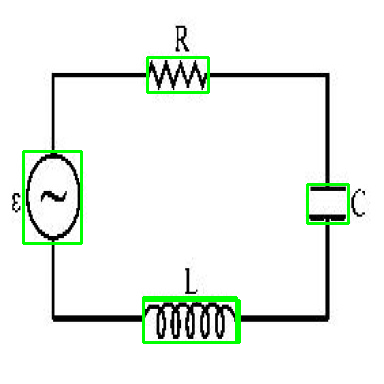

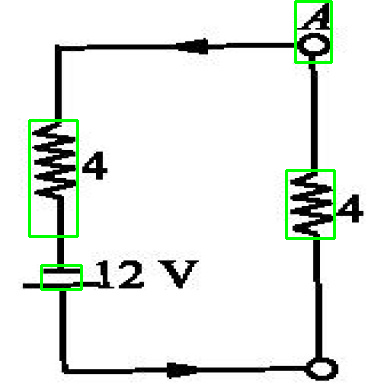

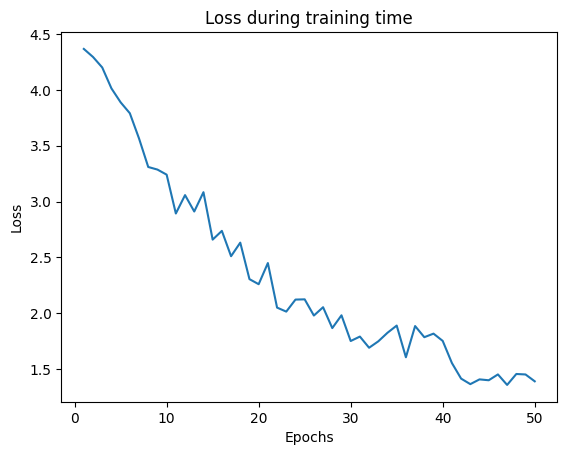

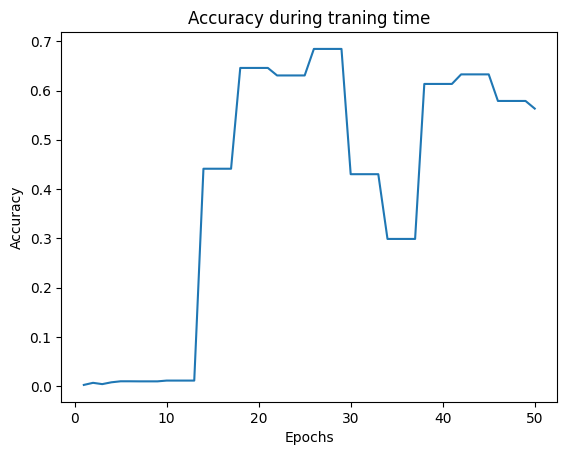

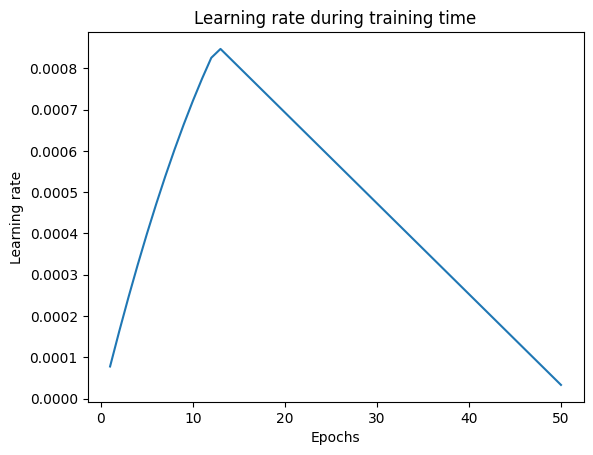

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def training_results():

  results = pd.read_csv("/content/runs/detect/train8/results.csv")
  plt.plot(results["epoch"], results["train/cls_loss"], label = "Training loss per epoch")
  plt.title("Loss during training time")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()
  plt.plot(results["epoch"], results["metrics/precision(B)"], label = "Training accuracy per epoch")
  plt.title("Accuracy during traning time")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.show()
  plt.plot(results["epoch"], results["lr/pg0"])
  plt.title("Learning rate during training time")
  plt.xlabel("Epochs")
  plt.ylabel("Learning rate")

"""
#training_results()
test_results = []
test_route = "/content/datasets/data/dataset/images/train"
for image in os.listdir(test_route):
  test_results.append(os.path.join(test_route,image))
"""

def model_testing(test_images):
  model = YOLO("/content/runs/detect/train12/weights/best.pt")
  image_results = model(test_images)
  for image in image_results:
    image_show_fn(image.boxes.xyxy,image.path)

test_images = ["/content/datasets/data/dataset/images/test/309_png.rf.afb52851067e1c0aa9cc92104fb60ea9.jpg",
               "/content/datasets/data/dataset/images/test/electrical_95_png.rf.39a4a800377fa1419dc79d9c4df4cd78.jpg"]
model_testing(test_images)
training_results()


['296_png.rf.2fa9d963874a376b48a1d10fa6b685f8.jpg',
 '342_png.rf.8d4df72c442c9034af89742cc95379d3.jpg']